In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify
plt.style.use('fivethirtyeight')


In [213]:
import warnings
warnings.filterwarnings('ignore')

In [214]:
df=pd.read_csv('D:/Data/Global Terrorism - START data/globalterrorism.csv',encoding='ISO-8859-1')

In [215]:
pd.set_option('display.max_columns',134)

In [216]:
df.shape

(181691, 135)

In [217]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,...,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN

In [218]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [219]:
def wordcloud(column_name):
    # make wordcloud from the text of given column
    text=" ".join(df[df[column_name].notna()][column_name])
    wordcloud = WordCloud(width=800, height=500, max_font_size=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [220]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day'},inplace=True)
df['month']=df['month'].replace(0,1)
df['day']=df['day'].replace(0,1)
df['date']=pd.to_datetime(df[["year", "month", "day"]])

# No of terrorist attack and death by terrorist attacks on dirrerent years

In [221]:
datewise_df=df.groupby(by='year').agg({'nkill':'sum','year':'count'})
datewise_df.rename(columns={'year':'no_of_attacks'},inplace=True)
datewise_df.head()

,nkill,no_of_attacks
year,,
1970,174.0,651
1971,173.0,471
1972,566.0,568
1973,370.0,473
1974,539.0,581


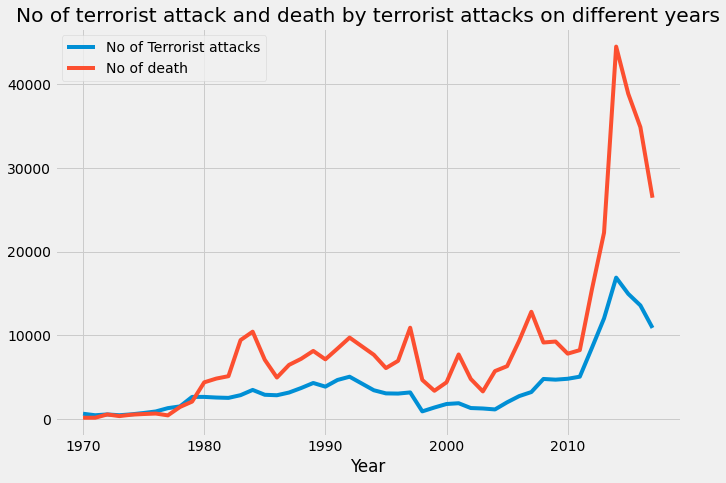

In [222]:
plt.figure(figsize=(10,7))
plt.plot(datewise_df.index,datewise_df['no_of_attacks'].values,label='No of Terrorist attacks')
plt.plot(datewise_df.index,datewise_df['nkill'].values,label='No of death ')
plt.xlabel('Year')
plt.title('No of terrorist attack and death by terrorist attacks on different years')
plt.legend()
plt.show()

# Death caused by terrorist attacks in different years

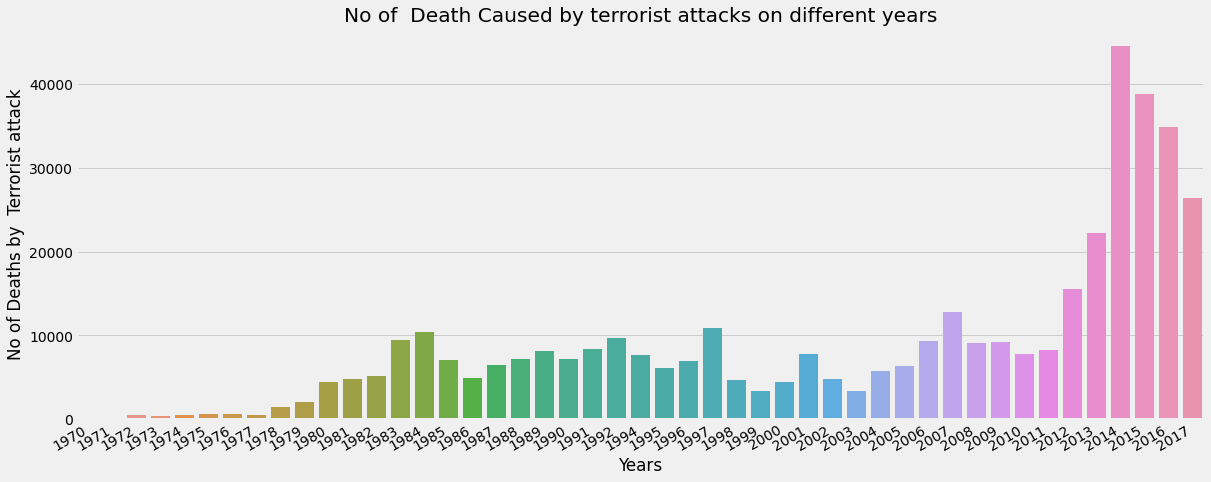

In [223]:
fig=plt.figure(figsize=(18,8))
sns.barplot(datewise_df.index,datewise_df['nkill'].values)
plt.ylabel('No of Deaths by  Terrorist attack')
plt.xlabel('Years')
plt.title('No of  Death Caused by terrorist attacks on different years')
fig.autofmt_xdate()
plt.show()

# No of terrorist attack vs Death caused by It in each year

Text(0.5, 1.0, ' No of terrorist attack vs Death caused by Terrorist attack in each year')

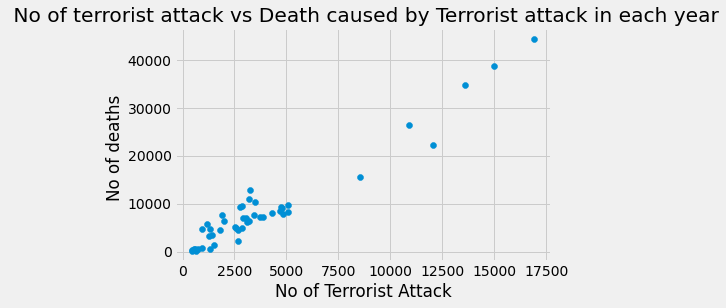

In [224]:
plt.scatter(datewise_df['no_of_attacks'].values,datewise_df['nkill'].values)
plt.xlabel('No of Terrorist Attack')
plt.ylabel('No of deaths ')
plt.title(' No of terrorist attack vs Death caused by Terrorist attack in each year')

#  Total Number of Terrorist attack and death caused by it in different country

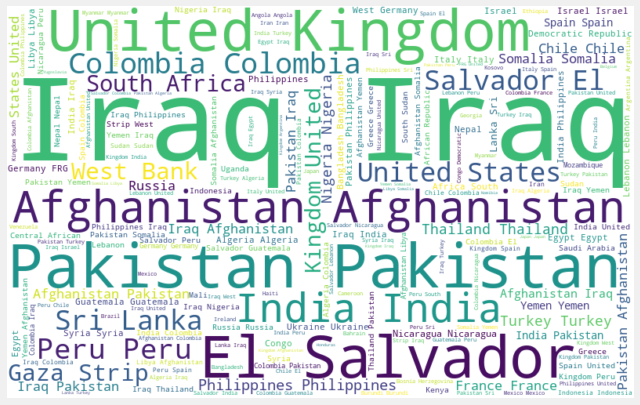

In [225]:
wordcloud('country_txt')

In [226]:
countrywise_df=df.groupby(by='country_txt').agg({'nkill':'sum','country_txt':'count'})
countrywise_df.rename(columns={'country_txt':'no_of_attacks'},inplace=True)
countrywise_df=countrywise_df.sort_values(by='nkill',ascending=False).head(10)

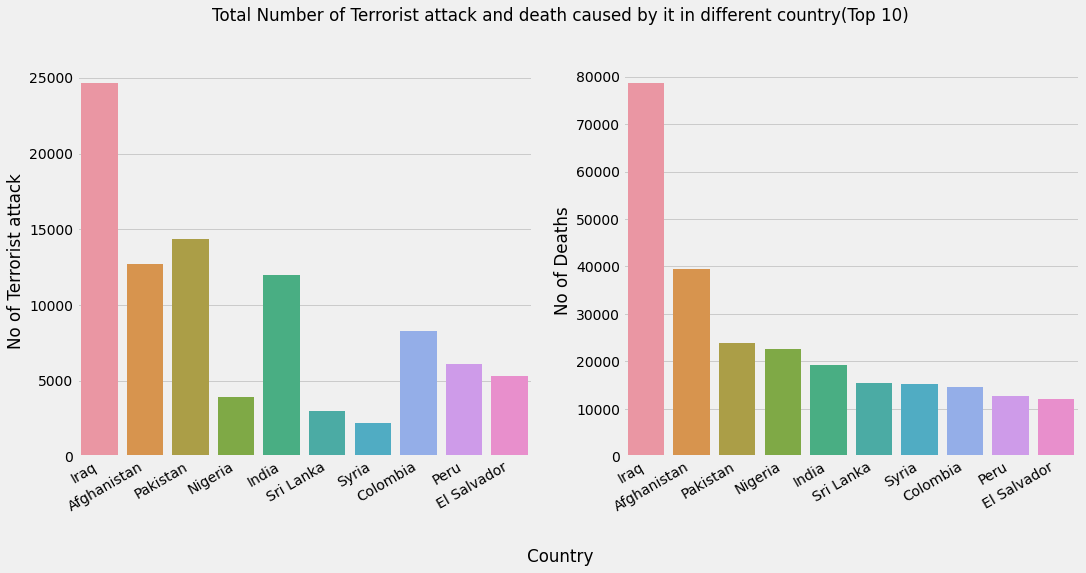

In [227]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.barplot(countrywise_df.index,countrywise_df['no_of_attacks'].values,ax=ax1)
sns.barplot(countrywise_df.index,countrywise_df['nkill'].values,ax=ax2)
ax1.set_ylabel('No of Terrorist attack')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('No of Deaths')
fig.autofmt_xdate()
fig.suptitle('Total Number of Terrorist attack and death caused by it in different country(Top 10)')
fig.supxlabel('Country')
plt.show()


# Deaths in different countries in different years

In [228]:
majority_country=countrywise_df.index[:7]
majority_country

Index(['Iraq', 'Afghanistan', 'Pakistan', 'Nigeria', 'India', 'Sri Lanka',
       'Syria'],
      dtype='object', name='country_txt')

In [261]:
def yearwise_kill_of_country(country_name):
    yearwise_kill_of_=df[df['country_txt']==country_name].groupby(by='year').agg({'nkill':'sum'})
    return yearwise_kill_of_.rename(columns={'nkill':f'{country_name}_kill'}).reset_index()


In [314]:

iraq_kill=yearwise_kill_of_country('Iraq')
afg_kill=yearwise_kill_of_country('Afghanistan')
pak_kill=yearwise_kill_of_country('Pakistan')
nigeria_kill=yearwise_kill_of_country('Nigeria')
ind_kill=yearwise_kill_of_country('India')

In [315]:
yearwise_country_death=iraq_kill.merge(afg_kill,on='year',how='outer').merge(nigeria_kill,on='year',how='outer').merge(
    pak_kill,on='year',how='outer').merge(ind_kill,on='year',how='outer')

In [316]:
yearwise_country_death.isnull().sum()

year                 0
Iraq_kill            9
Afghanistan_kill    14
Nigeria_kill        16
Pakistan_kill        3
India_kill           4
dtype: int64

In [319]:
yearwise_country_death=yearwise_country_death.fillna(0).sort_values(by='year',ascending=True).set_index('year')

In [324]:
yearwise_country_death.head()

,Iraq_kill,Afghanistan_kill,Nigeria_kill,Pakistan_kill,India_kill
year,,,,,
1970,0.0,0.0,0.0,4.0,0.0
1972,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.0,0.0,0.0,0.0
1975,0.0,0.0,0.0,1.0,4.0


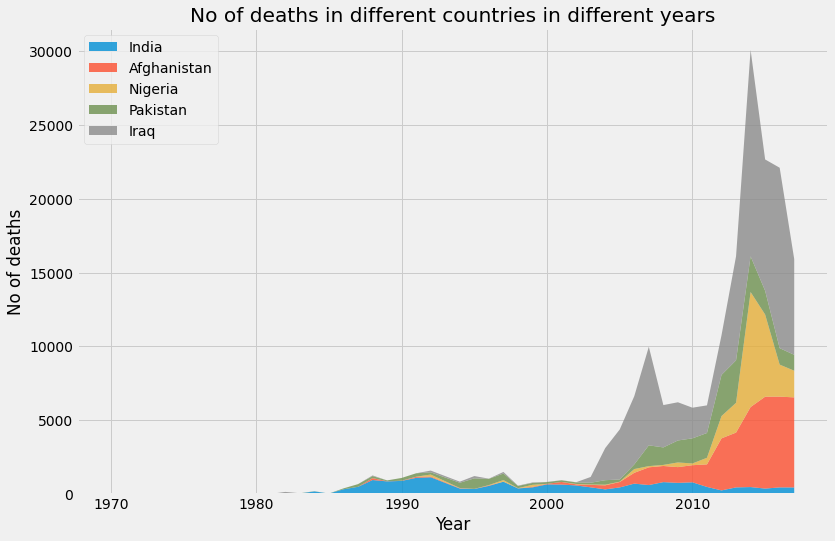

In [323]:
plt.figure(figsize=(12,8))
plt.stackplot(yearwise_country_death.index,
                yearwise_country_death['India_kill'],
                yearwise_country_death['Afghanistan_kill'],
                yearwise_country_death['Nigeria_kill'],
                yearwise_country_death['Pakistan_kill'],
                yearwise_country_death['Iraq_kill'],
                labels=['India','Afghanistan', 'Nigeria' ,'Pakistan', 'Iraq'], alpha=0.8)
plt.xlabel('Year')
plt.ylabel('No of deaths')
plt.title('No of deaths in different countries in different years')
plt.legend(loc='upper left')
plt.show()

# Total Number of Terrorist attack and death caused by it in different Region!

In [ ]:
regionwise_df=df.groupby(by='region_txt').agg({'nkill':'sum','region_txt':'count'})
regionwise_df.rename(columns={'region_txt':'no_of_attacks'},inplace=True)
regionwise_df=regionwise_df.sort_values(by='nkill',ascending=False).head(10)

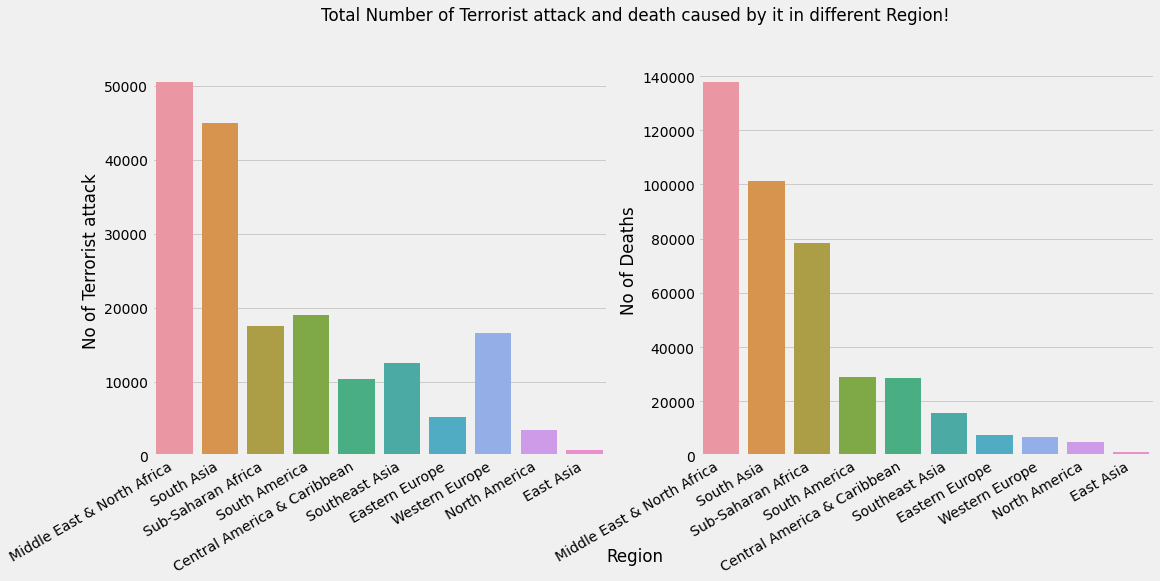

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.barplot(regionwise_df.index,regionwise_df['no_of_attacks'].values,ax=ax1)
sns.barplot(regionwise_df.index,regionwise_df['nkill'].values,ax=ax2)
ax1.set_ylabel('No of Terrorist attack')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('No of Deaths')
fig.autofmt_xdate()
fig.suptitle('Total Number of Terrorist attack and death caused by it in different Region!')
fig.supxlabel('Region')
plt.show()

# Summary of incident

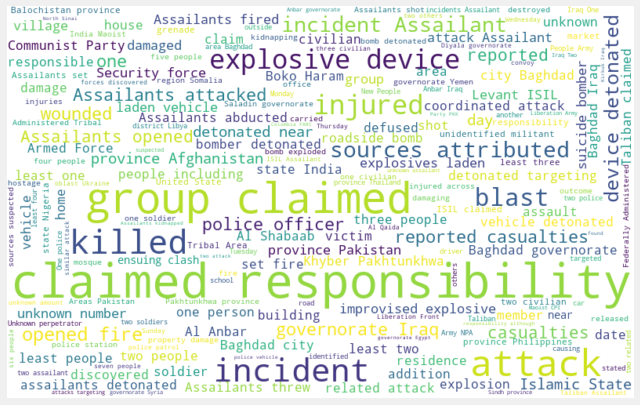

In [ ]:
wordcloud('summary')

# Total Number of Terrorist attack and death caused by it in different Attack type(Top-10)

In [ ]:
attacktypewise_df=df.groupby(by='attacktype1_txt').agg({'nkill':'sum','attacktype1_txt':'count'})
attacktypewise_df.rename(columns={'attacktype1_txt':'no_of_attacks'},inplace=True)
attacktypewise_df=attacktypewise_df.sort_values(by='nkill',ascending=False).head(10)

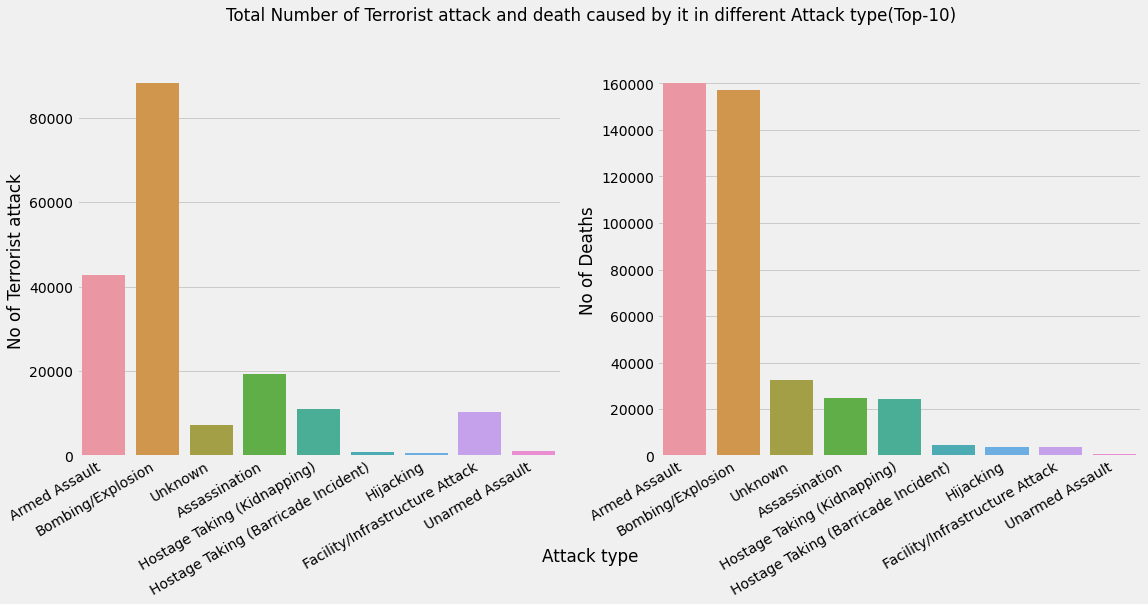

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,8))
sns.barplot(attacktypewise_df.index,attacktypewise_df['no_of_attacks'].values,ax=ax1)
sns.barplot(attacktypewise_df.index,attacktypewise_df['nkill'].values,ax=ax2)
ax1.set_ylabel('No of Terrorist attack')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('No of Deaths')
fig.autofmt_xdate()
fig.suptitle('Total Number of Terrorist attack and death caused by it in different Attack type(Top-10)')
fig.supxlabel('Attack type')
plt.show()

# where are the terrorist targeting more?

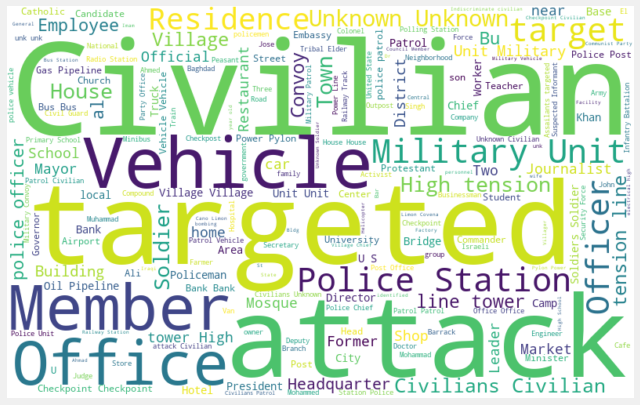

In [ ]:
wordcloud('target1')

# which group of terrorist used to cause such incident most?

In [ ]:
terroristwise_df=df.drop(df[df['gname']=='Unknown'].index).groupby(by='gname').agg({'nkill':'sum','gname':'count'})
terroristwise_df.rename(columns={'gname':'no_of_attacks'},inplace=True)
terroristwise_df=terroristwise_df.sort_values(by='nkill',ascending=False).head(10)

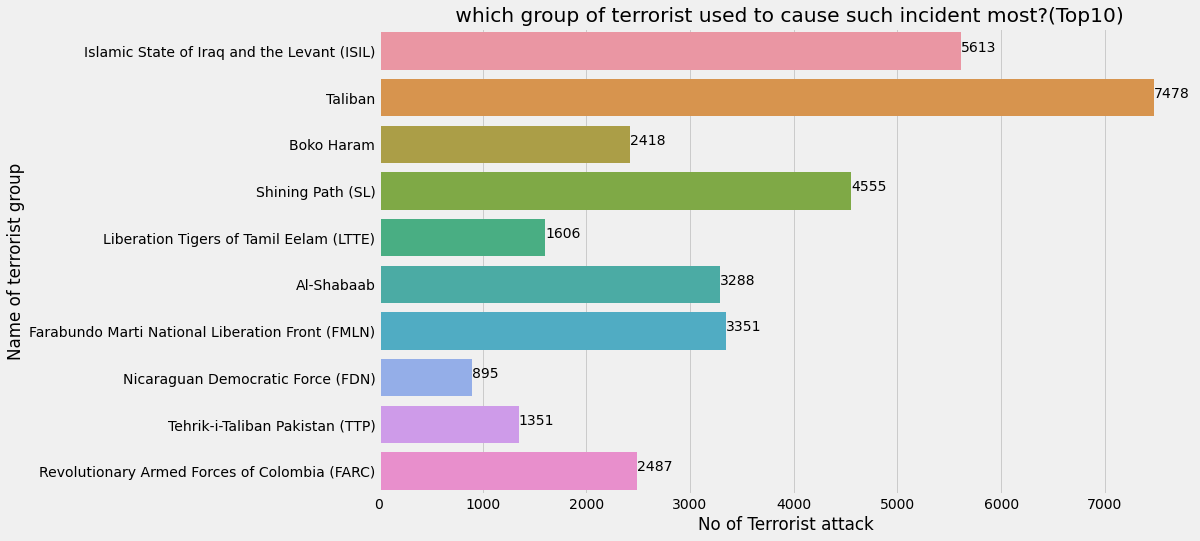

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(terroristwise_df['no_of_attacks'].values,terroristwise_df.index)
for index, value in enumerate(terroristwise_df['no_of_attacks'].values):
    plt.text(value, index, str(value))
plt.ylabel('Name of terrorist group')
plt.xlabel('No of Terrorist attack')
plt.title(' which group of terrorist used to cause such incident most?(Top10)')
plt.show()

# Total numbers of  Deaths caused by different group of terrorist group

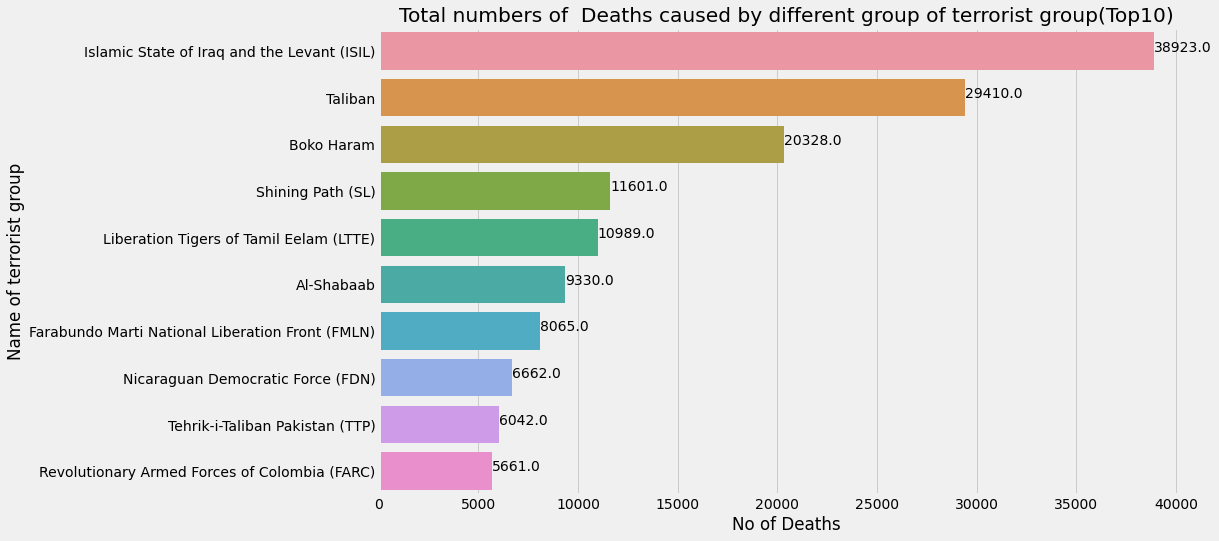

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(terroristwise_df['nkill'].values,terroristwise_df.index)
for index, value in enumerate(terroristwise_df['nkill'].values):
    plt.text(value, index, str(value))
plt.ylabel('Name of terrorist group')
plt.xlabel('No of Deaths')
plt.title('Total numbers of  Deaths caused by different group of terrorist group(Top10)')
plt.show()

# Distribution of Deaths

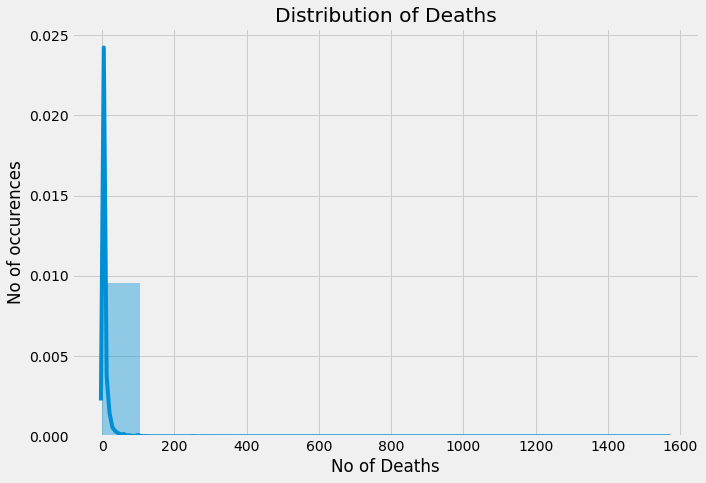

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(x=df['nkill'],bins=15)
plt.xlabel('No of Deaths')
plt.ylabel('No of occurences')
plt.title('Distribution of Deaths')
plt.show()

#  Type of primary weapen that are Mostly used in Terrorist attack!

In [ ]:
weapontypewise_df=df.groupby(by='weaptype1_txt').agg({'nkill':'sum','weaptype1_txt':'count'})
weapontypewise_df.rename(columns={'weaptype1_txt':'no_of_attacks'},inplace=True)
weapontypewise_df=weapontypewise_df.sort_values(by='nkill',ascending=False).head(5)

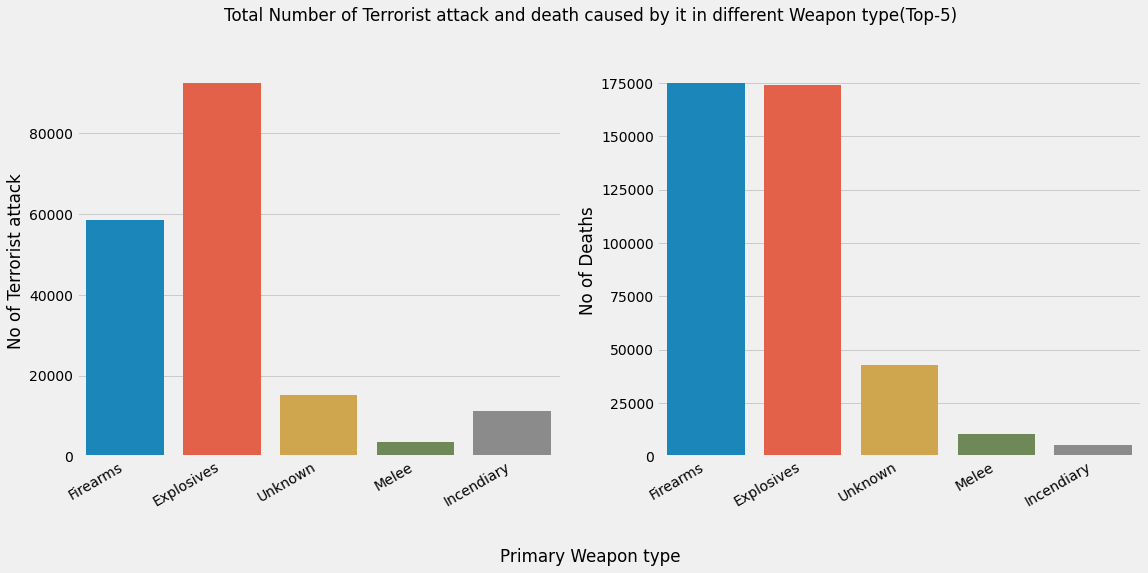

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,8))
sns.barplot(weapontypewise_df.index,weapontypewise_df['no_of_attacks'].values,ax=ax1)
sns.barplot(weapontypewise_df.index,weapontypewise_df['nkill'].values,ax=ax2)
ax1.set_ylabel('No of Terrorist attack')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('No of Deaths')
fig.autofmt_xdate()
fig.suptitle('Total Number of Terrorist attack and death caused by it in different Weapon type(Top-5)')
fig.supxlabel('Primary Weapon type')
plt.show()

#  Terrorist who has attacked Afghanistan Most!

In [ ]:
afg_terrrorism=df[df['country_txt']=='Afghanistan']['gname'].value_counts().head(6)

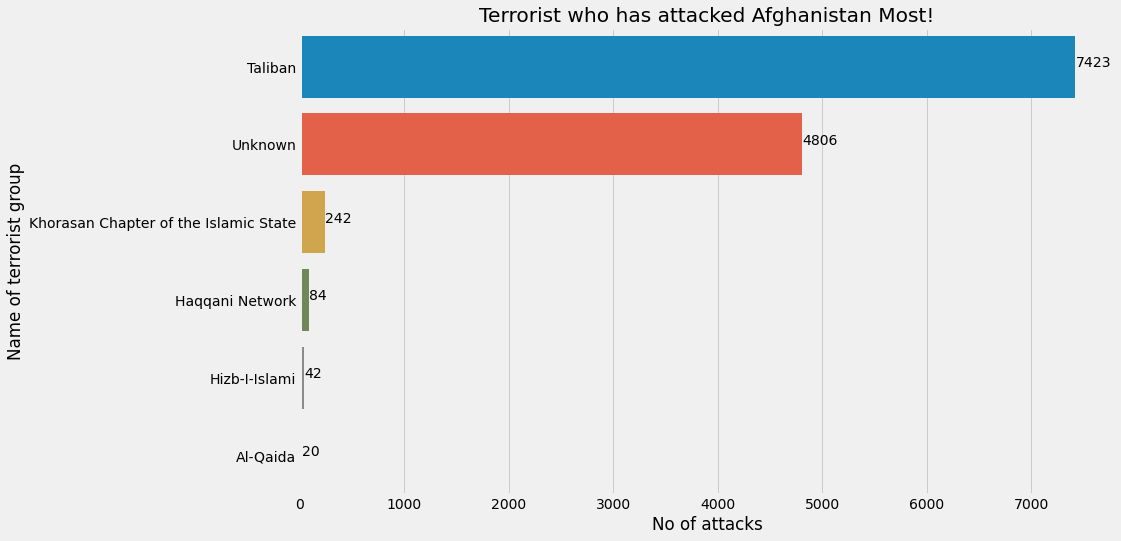

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(afg_terrrorism.values,afg_terrrorism.index)
for index, value in enumerate(afg_terrrorism.values):
    plt.text(value, index, str(value))
plt.ylabel('Name of terrorist group')
plt.xlabel('No of attacks')
plt.title('Terrorist who has attacked Afghanistan Most!')
plt.show()